In [1]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
plt.style.use('seaborn')

In [3]:
path = './Dataset/test'

img_dict = {}
for folder in os.listdir(path):
    img = np.random.choice(os.listdir(os.path.join(path,folder)))
    img_dict[folder] = img

print(img_dict)

{'Covid': 'kjr-21-e24-g001-l-a.jpg', 'Normal': 'IM-0388-0001.jpeg'}


`{'Covid': 'nejmc2001573_f1b.jpeg', 'Normal': 'IM-0389-0001.jpeg'}`

In [4]:
def load_image(img_dict=img_dict):

    covid_path = os.path.join('./Dataset/test/Covid',img_dict['Covid'])
    normal_path = os.path.join('./Dataset/test/Normal',img_dict['Normal'])
    
    covid = image.load_img(covid_path,target_size=(224,224,3))
    covid = image.img_to_array(covid)/255.0
    
    normal = image.load_img(normal_path,target_size=(224,224,3))
    normal = image.img_to_array(normal)/255.0
    
    return covid,normal

In [5]:
covid_img,normal_img = load_image(img_dict)

### Plot Image

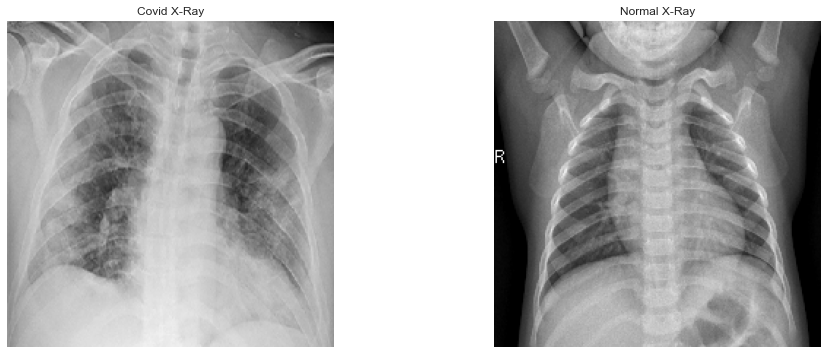

In [6]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

ax[0].imshow(covid_img)
ax[0].set_title('Covid X-Ray')
ax[0].axis('off')

ax[1].imshow(normal_img)
ax[1].set_title('Normal X-Ray')
ax[1].axis('off')

plt.show()

### Load Model

In [7]:
path = './Weights/Scratch/model_6_1.00.h5'

In [8]:
from keras.models import load_model
from keras.models import Model

model = load_model(path)

In [10]:
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

(64, 2)

In [11]:
cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0     